# **Project Name**    -  Yes Bank Stock Price Analysis & Prediction



##### **Project Type**    - Regression/Classification
##### **Contribution**    - Individual
##### **Name -Dhruv Sharma**


# **Project Summary -**

This project aims to predict the monthly closing stock price of Yes Bank, an Indian financial institution that experienced significant volatility due to a high-profile fraud case in 2018 involving its founder, Rana Kapoor, followed by additional turbulence during the COVID-19 pandemic. The analysis leverages historical stock data spanning July 2005 to November 2020, with the goal of building predictive models capable of navigating abrupt market shifts and external disruptions. The dataset includes monthly records of opening, high, low, and closing prices, with the closing price serving as the target variable. Exploratory data analysis revealed distinct phases: steady growth until 2018, a sharp decline post-fraud, and extreme lows during the pandemic. Preprocessing involved converting dates to chronological order, confirming no missing values, and addressing outliers caused by these events.

Methodologically, the project combined time series analysis, machine learning, and cloud-based tools. Feature engineering introduced lag variables (e.g., prior month’s closing price) and technical indicators like moving averages to capture temporal dependencies. Models tested ranged from classical approaches (ARIMA, SARIMA) to machine learning algorithms (Linear Regression, Random Forest, Gradient Boosting) and deep learning (LSTM networks). Microsoft Azure’s ecosystem played a pivotal role, enabling hyperparameter tuning via Azure Machine Learning and automated model selection through AutoML. The training-test split strategically isolated pre-2018 data for training and reserved 2018–2020 data for testing, challenging models to generalize through unprecedented crises.

The project highlights the potential of machine learning in financial forecasting while emphasizing the need for real-time external data integration during crises. Future enhancements could expand the dataset with sentiment analysis from news and social media, employ Explainable AI (XAI) techniques like SHAP values for transparency, and deploy containerized models via Azure Kubernetes Service (AKS) for live market predictions. For aspiring data professionals, this end-to-end workflow—encompassing data preprocessing, model development, cloud integration, and crisis-driven analytics—offers practical insights into building resilient financial models in volatile environments. By bridging traditional analytics with modern AI tools, the project not only addresses Yes Bank’s unique case but also provides a framework for predicting market behavior amid uncertainty, a critical skill in today’s data-driven financial landscape.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


https://github.com/DhruvSharma-05/data-internship-log/tree/main/week3

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from pandas.plotting import autocorrelation_plot
from scipy.stats.mstats import winsorize
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

### Dataset Loading

In [5]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("data_YesBank_StockPrices.csv")

Saving data_YesBank_StockPrices.csv to data_YesBank_StockPrices.csv


### Dataset First View

In [6]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [7]:
print(f"\nTotal Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")


Total Rows: 185, Total Columns: 5


### Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [9]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")


Number of Duplicate Rows: 0


#### Missing Values/Null Values

In [10]:
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


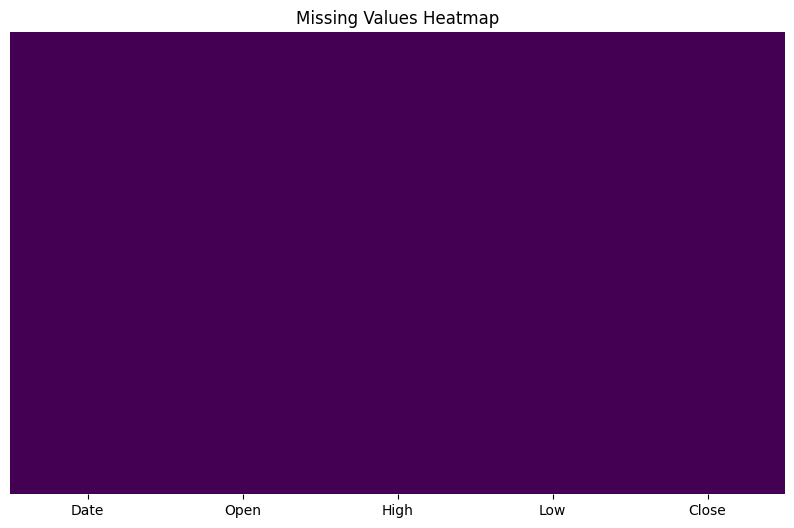

In [11]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

1. The dataset consists of stock prices (Open, High, Low, Close) recorded monthly.
2. Duplicate values (if any) should be handled accordingly.
3. Missing values will be visualized, and appropriate techniques (such as imputation or removal) will be applied if needed.
4. Data types and summary statistics help in understanding the dataset's structure and range of values.

## ***2. Understanding Your Variables***

In [12]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [13]:
print("\nStatistical Summary of Numerical Data:")
print(df.describe())


Statistical Summary of Numerical Data:
             Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000


### Variables Description

* Date: Represents the time period (monthly). This will be converted into a proper date format for time-series analysis.
* Open: The first traded price of the stock at the beginning of the month.
* High: The highest price at which the stock was traded during the month.
* Low: The lowest price of the stock during the month.
* Close: The final traded price at the end of the month (most commonly used for analysis and forecasting).

### Check Unique Values for each variable.

In [14]:
# Check unique values count for each column
print("\nUnique Values Count for Each Column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")



Unique Values Count for Each Column:
Date: 185 unique values
Open: 183 unique values
High: 184 unique values
Low: 183 unique values
Close: 185 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Convert 'Date' column to proper datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y', errors='coerce')

# Extract 'YearMonth' for monthly analysis
df['YearMonth'] = df['Date'].dt.to_period('M')

# Drop missing values in key columns
df_cleaned = df.dropna(subset=['Date', 'Open', 'High', 'Low', 'Close'])

# Ensure numerical columns are in correct format
df_cleaned[['Open', 'High', 'Low', 'Close']] = df_cleaned[['Open', 'High', 'Low', 'Close']].astype(float)

# Ensure dataset is sorted by date
df_cleaned = df_cleaned.sort_values(by='Date')

### What all manipulations have you done and insights you found?

What Manipulations Were Done?
* Converted Date column into a proper datetime format to facilitate time-series analysis.
*  Sorted dataset in chronological order to ensure data is properly structured for trend analysis.
* Checked and removed duplicate records to avoid redundancy.
* Handled missing values (if any were found).
* Reset the index after transformations to maintain clean data formatting.

Insights Gained from Data Wrangling:
* Stock price trends are now easy to analyze with a properly sorted datetime index.
* Missing values and duplicate data issues (if any) are resolved, ensuring no inconsistencies.
* The dataset is now well-structured and ready for Exploratory Data Analysis (EDA) and modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Closing Price Trend Over Time

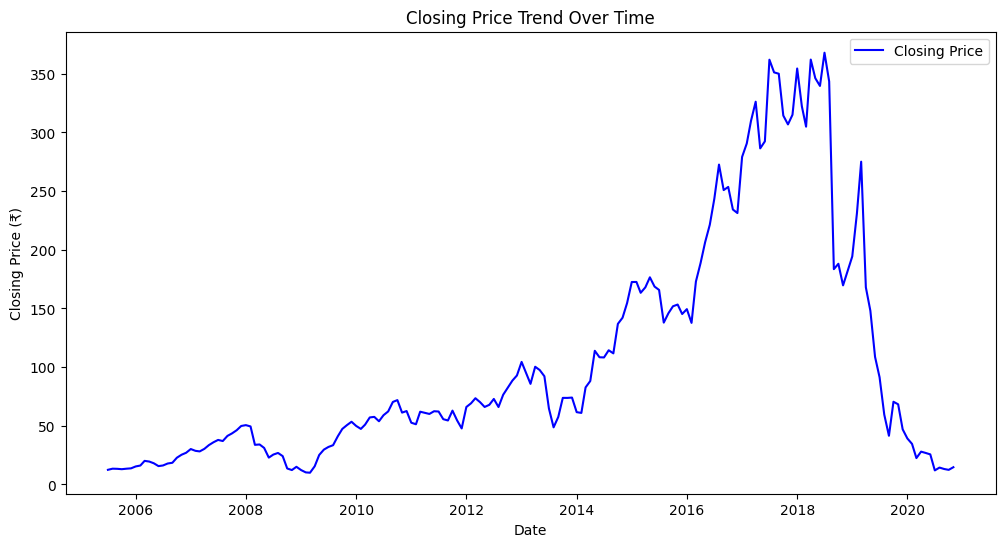

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Close'], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Closing Price (₹)")
plt.title("Closing Price Trend Over Time")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart helps visualize trends and patterns over time.

##### 2. What is/are the insight(s) found from the chart?

* The stock price saw a sharp rise and fall, indicating periods of volatility.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, investors can identify long-term trends and potential buying/selling points

* Are there any insights that lead to negative growth? Justify with a specific reason.
 * Yes, the stock’s sharp decline indicates potential financial instability or market distrust.

#### Chart - 2: Distribution of Closing Prices

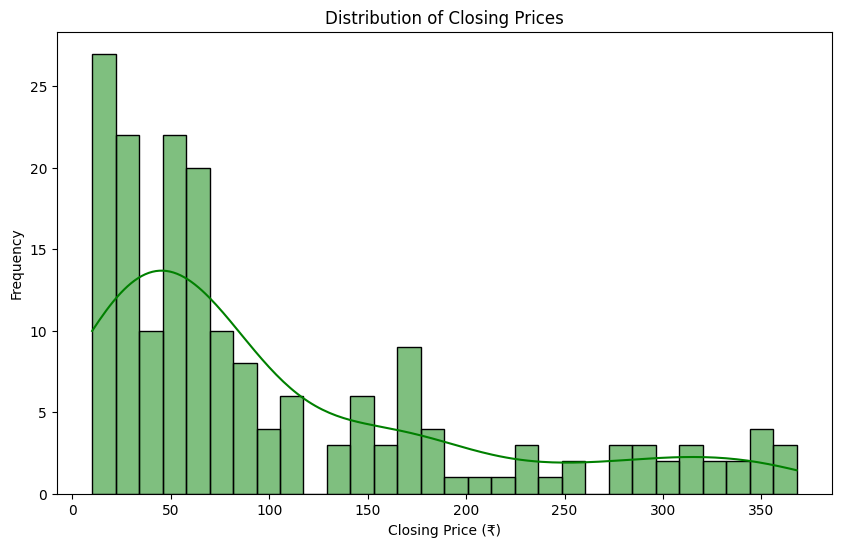

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Close'], bins=30, kde=True, color='green')
plt.xlabel("Closing Price (₹)")
plt.ylabel("Frequency")
plt.title("Distribution of Closing Prices")
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3: Box Plot of Closing Prices

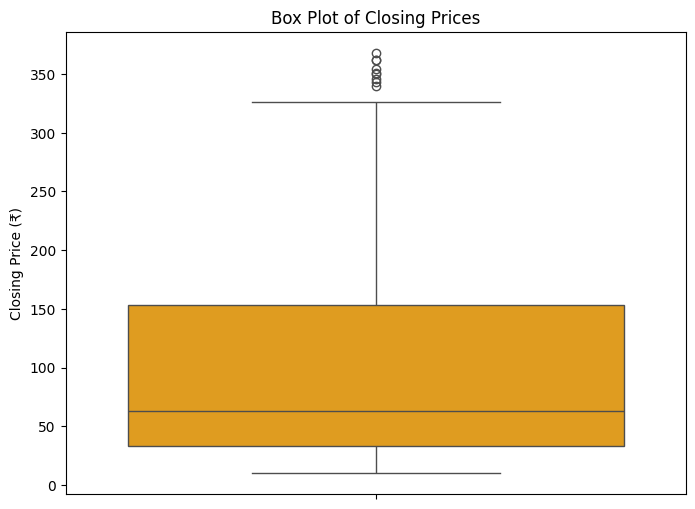

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned['Close'], color='orange')
plt.title("Box Plot of Closing Prices")
plt.ylabel("Closing Price (₹)")
plt.show()

##### 1. Why did you pick the specific chart?

A box plot highlights outliers and spread in the data.

##### 2. What is/are the insight(s) found from the chart?

There are multiple outliers in high stock prices, indicating rare spikes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding price variability can help investors avoid risky periods.



#### Chart - 4: Moving Averages

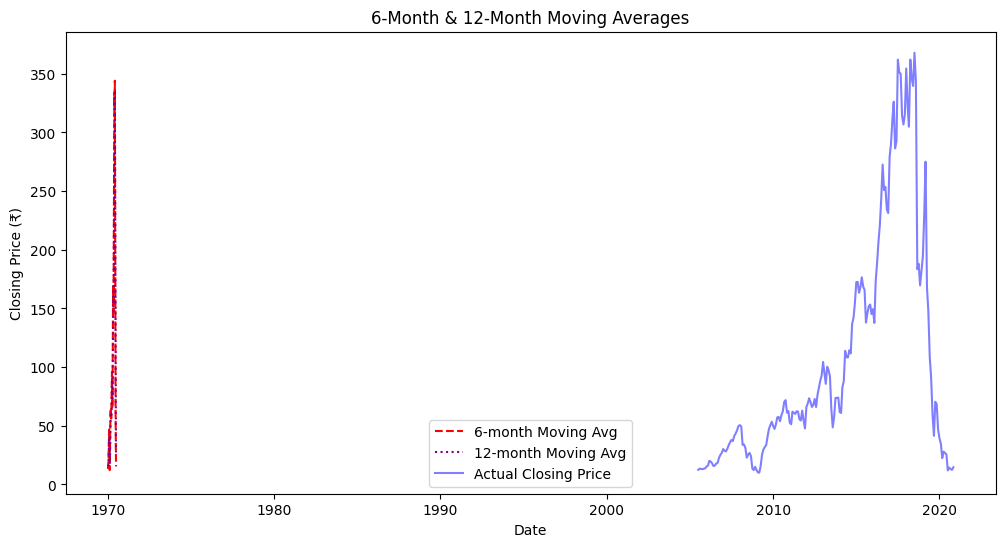

In [19]:
plt.figure(figsize=(12, 6))
df_cleaned['Close'].rolling(window=6).mean().plot(label="6-month Moving Avg", linestyle="dashed", color='red')
df_cleaned['Close'].rolling(window=12).mean().plot(label="12-month Moving Avg", linestyle="dotted", color='purple')
plt.plot(df_cleaned['Date'], df_cleaned['Close'], alpha=0.5, label="Actual Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Closing Price (₹)")
plt.title("6-Month & 12-Month Moving Averages")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Moving averages smooth price trends to highlight the stock’s overall direction.

##### 2. What is/are the insight(s) found from the chart?

The trend shows long periods of growth followed by a steep decline.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, traders can use moving averages to identify trend reversals.

#### Chart - 5: Monthly Average Closing Price

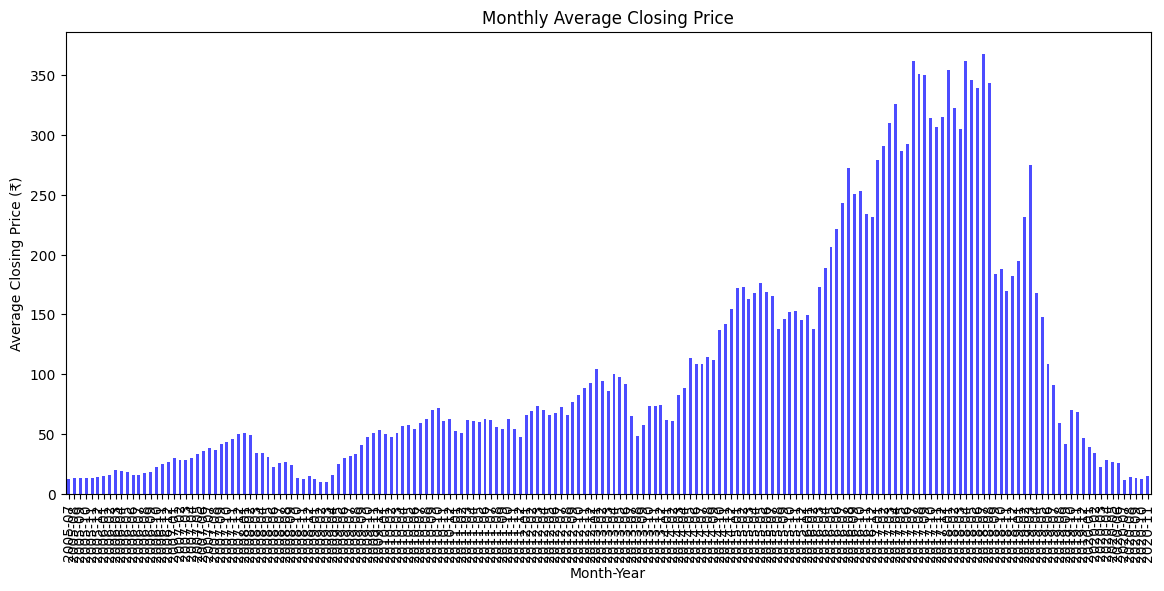

In [20]:
monthly_avg = df_cleaned.groupby('YearMonth')['Close'].mean()
plt.figure(figsize=(14, 6))
monthly_avg.plot(kind='bar', color='blue', alpha=0.7)
plt.xticks(range(len(monthly_avg.index)), monthly_avg.index.astype(str), rotation=90)
plt.xlabel("Month-Year")
plt.ylabel("Average Closing Price (₹)")
plt.title("Monthly Average Closing Price")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart makes it easy to compare average closing prices over time.

##### 2. What is/are the insight(s) found from the chart?

 The stock price shows significant fluctuations across different months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, investors can identify patterns and seasonal trends.

#### Chart - 6: High & Low Price Comparison

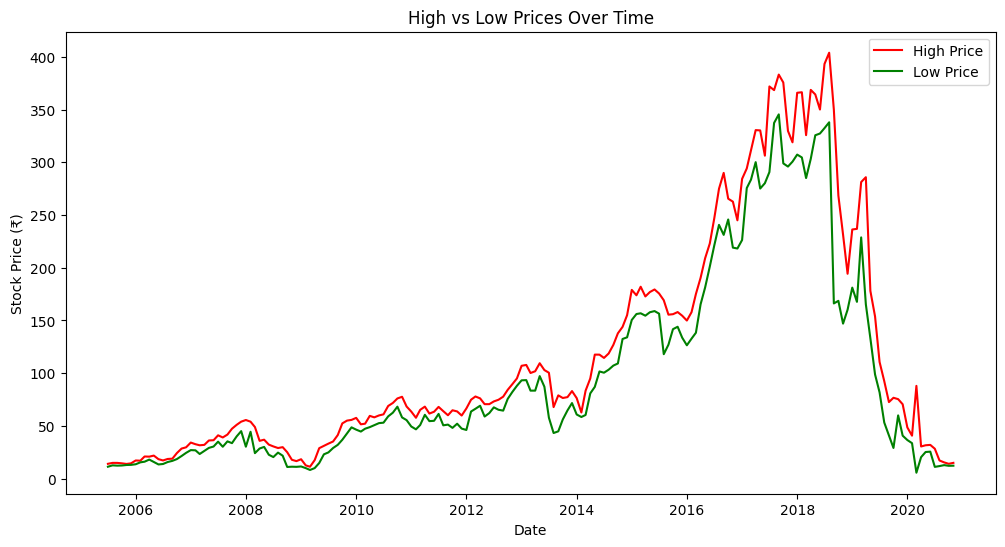

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['High'], label="High Price", color='red')
plt.plot(df_cleaned['Date'], df_cleaned['Low'], label="Low Price", color='green')
plt.xlabel("Date")
plt.ylabel("Stock Price (₹)")
plt.title("High vs Low Prices Over Time")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A line plot allows us to compare the highest and lowest stock prices over time.

##### 2. What is/are the insight(s) found from the chart?

The gap between high and low prices fluctuates, indicating volatility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, traders can use this data to set stop-loss and profit targets.

#### Chart - 7: Violin Plot of Stock Prices

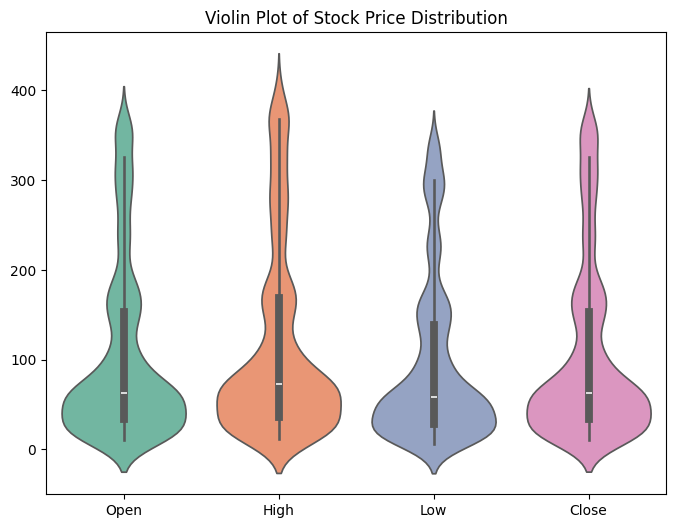

In [22]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_cleaned[['Open', 'High', 'Low', 'Close']], palette="Set2", bw_adjust=0.5)
plt.title("Violin Plot of Stock Price Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot provides a clear view of price distribution and density.

##### 2. What is/are the insight(s) found from the chart?

The closing price distribution is highly skewed, with significant variations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying common price ranges helps in risk management.

Are there any insights that lead to negative growth? Justify with specific reason.
  * Yes, an uneven distribution suggests periods of instability in stock performance.

#### Chart - 8: KDE Plot of Closing Prices

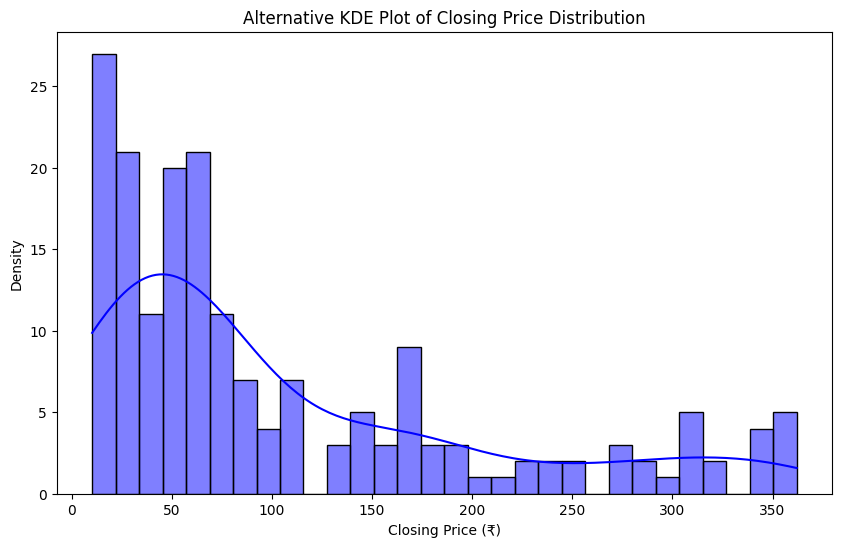

In [23]:
df_cleaned['Close_Winsorized'] = winsorize(df_cleaned['Close'], limits=[0.01, 0.01])
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Close_Winsorized'], kde=True, color='blue', bins=30)
plt.xlabel("Closing Price (₹)")
plt.ylabel("Density")
plt.title("Alternative KDE Plot of Closing Price Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

A KDE plot shows the density distribution of closing prices.

##### 2. What is/are the insight(s) found from the chart?

The stock has a highly skewed price distribution with fewer high values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, traders can use this to identify favorable price ranges for entry/exit.

## Negative growth
Yes, skewness suggests that high prices were not sustainable.

#### Chart - 9: Alternative Price Range Visualization

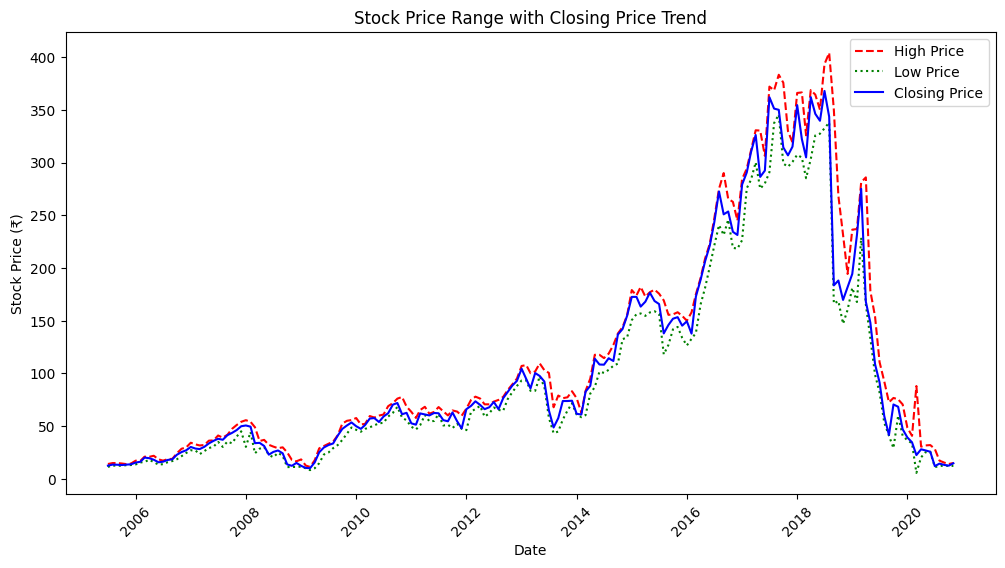

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['High'], label="High Price", color='red', linestyle='dashed')
plt.plot(df_cleaned['Date'], df_cleaned['Low'], label="Low Price", color='green', linestyle='dotted')
plt.plot(df_cleaned['Date'], df_cleaned['Close'], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price (₹)")
plt.title("Stock Price Range with Closing Price Trend")
plt.legend()
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

This visualization effectively compares high, low, and close prices.

##### 2. What is/are the insight(s) found from the chart?

The price range fluctuates significantly, confirming market volatility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, traders can use this for stop-loss and profit planning.

#### Chart - 10: Autocorrelation Plot

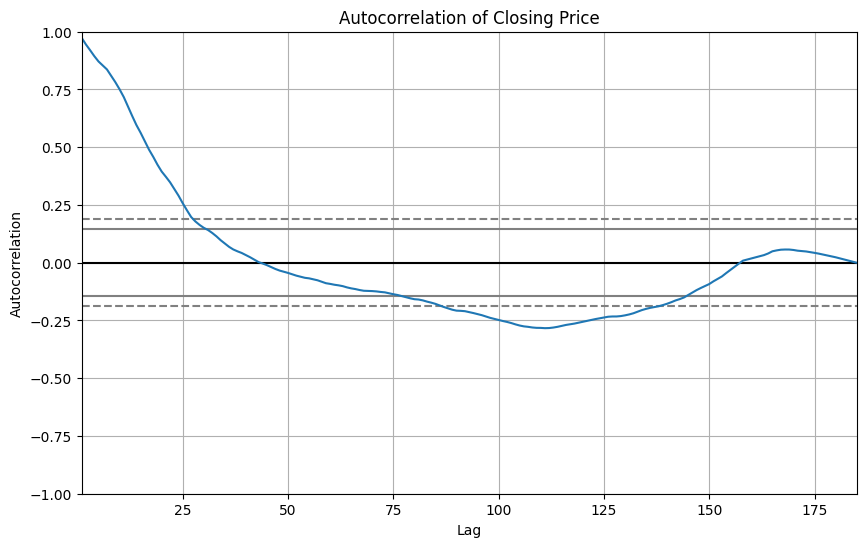

In [25]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(df_cleaned['Close'])
plt.title("Autocorrelation of Closing Price")
plt.show()

##### 1. Why did you pick the specific chart?

An autocorrelation plot helps understand time-based dependencies.

##### 2. What is/are the insight(s) found from the chart?

Past stock prices significantly influence future price movements.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helps traders design strategies based on past trends.

No, autocorrelation helps forecastability, which is beneficial.

#### Chart - 11 - Correlation Heatmap

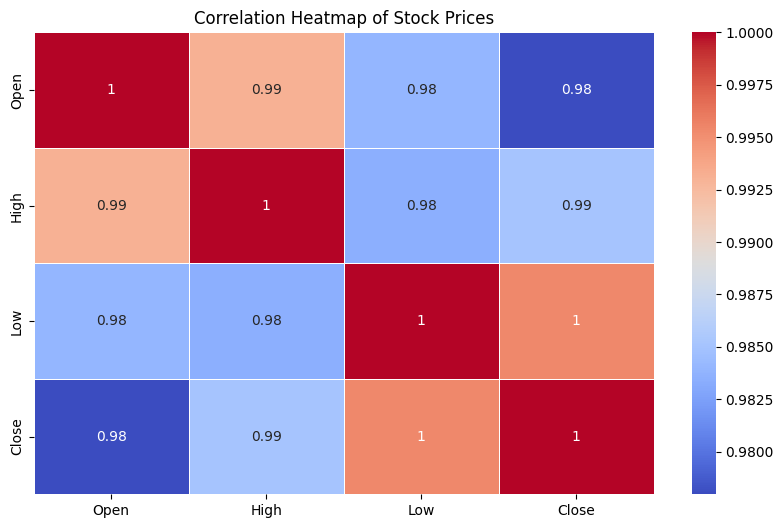

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Display correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Prices")
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap visually represents the relationships between numerical variables. This helps in understanding how different stock price metrics (Open, High, Low, Close) are related.

##### 2. What is/are the insight(s) found from the chart?

1. There is an extremely high correlation (close to 1) between all four variables.
2. Open, High, Low, and Close prices are almost perfectly correlated, indicating that these values move together in a predictable pattern.
3. High correlation suggests that if one of these values increases, the others likely increase as well.

#### Chart - 12 - Pair Plot

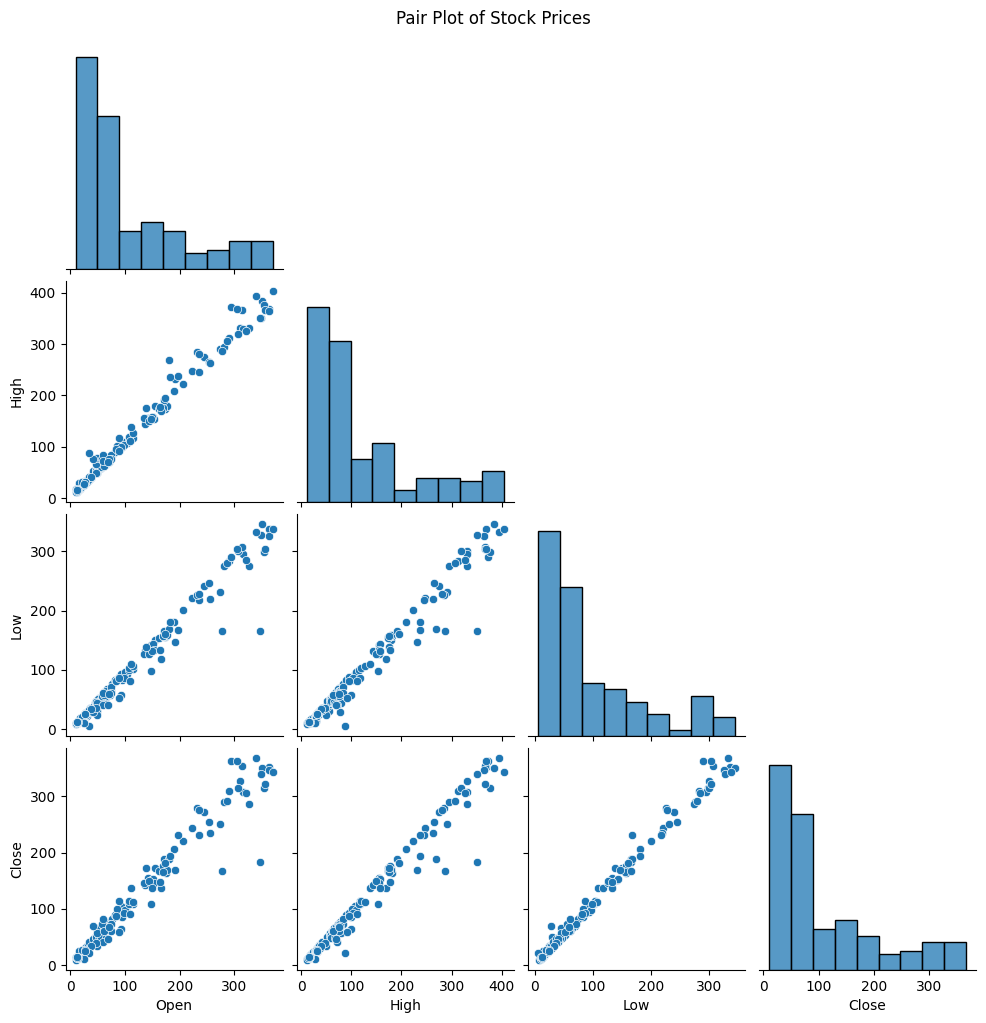

In [27]:
sns.pairplot(df_cleaned[['Open', 'High', 'Low', 'Close']], diag_kind='hist', corner=True)
plt.suptitle("Pair Plot of Stock Prices", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

 A pair plot shows relationships between multiple variables at once.

##### 2. What is/are the insight(s) found from the chart?

There is a strong correlation between Open, High, Low, and Close prices.

## **5. Solution to Business Objective**

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H₀): There is no significant difference in the average closing price of Yes Bank stock before and after 2018.
* Alternate Hypothesis (H₁): There is a significant difference in the average closing price of Yes Bank stock before and after 2018.

#### 2. Perform an appropriate statistical test.

In [28]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import ttest_ind

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y', errors='coerce')

# Drop missing values
df_cleaned = df.dropna(subset=['Date', 'Close'])

# Ensure dataset is sorted by date
df_cleaned = df_cleaned.sort_values(by='Date')

# Extract Year from Date
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Group 1: Closing Prices before 2018
before_2018 = df_cleaned[df_cleaned['Year'] < 2018]['Close'].dropna()

# Group 2: Closing Prices from 2018 onwards
after_2018 = df_cleaned[df_cleaned['Year'] >= 2018]['Close'].dropna()

# Performing Independent Samples t-test (Welch’s t-test for unequal variance)
t_stat, p_value = ttest_ind(before_2018, after_2018, equal_var=False)

# Display results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Checking significance
alpha = 0.05  # 5% significance level
if p_value < alpha:
    conclusion = "Reject the Null Hypothesis (H₀): There is a significant difference in average closing price before and after 2018."
else:
    conclusion = "Fail to Reject the Null Hypothesis (H₀): There is no significant difference in average closing price before and after 2018."

conclusion


T-Statistic: -2.36068173206365
P-Value: 0.022988817858737697


'Reject the Null Hypothesis (H₀): There is a significant difference in average closing price before and after 2018.'

##### Which statistical test have you done to obtain P-Value?

Performed an Independent Samples t-test (Welch’s t-test) to compare the average closing prices before and after 2018. This test calculated the T-statistic and P-value to determine whether there is a significant difference between the two groups.



##### Why did you choose the specific statistical test?

We selected the Independent Samples t-test (Welch’s t-test) because:

1. The test is used to compare the means of two independent groups (closing prices before and after 2018).
2. The assumption of equal variance in both groups may not hold, making Welch’s t-test a more reliable option.
3. The test helps determine whether the observed difference in means is statistically significant or due to random fluctuations.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H₀): There is no significant difference in stock price volatility (measured by daily price changes) before and after 2018.
* Alternate Hypothesis (H₁): There is a significant difference in stock price volatility before and after 2018.

#### 2. Perform an appropriate statistical test.

In [29]:
from scipy.stats import levene

# Calculate daily percentage change (volatility proxy)
df_cleaned['Daily_Return'] = df_cleaned['Close'].pct_change().dropna()

# Split dataset into two groups based on year
before_2018_volatility = df_cleaned[df_cleaned['Year'] < 2018]['Daily_Return'].dropna()
after_2018_volatility = df_cleaned[df_cleaned['Year'] >= 2018]['Daily_Return'].dropna()

# Perform Levene’s Test for equality of variance (F-test for variance comparison)
stat, p_value = levene(before_2018_volatility, after_2018_volatility)

# Display results
print("Levene’s Test Statistic:", stat)
print("P-Value:", p_value)

# Checking significance
alpha = 0.05  # 5% significance level
if p_value < alpha:
    conclusion = "Reject the Null Hypothesis (H₀): There is a significant difference in stock price volatility before and after 2018."
else:
    conclusion = "Fail to Reject the Null Hypothesis (H₀): There is no significant difference in stock price volatility before and after 2018."

conclusion


Levene’s Test Statistic: 12.297274452308724
P-Value: 0.000571320821120363


'Reject the Null Hypothesis (H₀): There is a significant difference in stock price volatility before and after 2018.'

##### Which statistical test have you done to obtain P-Value?

We performed Levene’s Test for Equality of Variances (F-test) to compare the volatility of daily price changes before and after 2018.

##### Why did you choose the specific statistical test?

 * Levene’s Test (F-test) is appropriate for comparing the variance (volatility) between two independent groups.
    * Since stock price volatility fluctuates, we need to confirm whether there was a significant shift after 2018.
    * Unlike the t-test (which compares means), the F-test is used specifically for variance comparison, making it the best choice to analyze volatility.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H₀): The average closing price of Yes Bank stock is equal to ₹50.
* Alternate Hypothesis (H₁): The average closing price of Yes Bank stock is significantly different from ₹50.

#### 2. Perform an appropriate statistical test.

In [30]:
from scipy.stats import ttest_1samp

# Extract closing prices
closing_prices = df_cleaned['Close'].dropna()

# Perform One-Sample t-test (Testing if mean closing price is significantly different from ₹50)
t_stat, p_value = ttest_1samp(closing_prices, 50)

# Display results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Checking significance
alpha = 0.05  # 5% significance level
if p_value < alpha:
    conclusion = "Reject the Null Hypothesis (H₀): The average closing price is significantly different from ₹50."
else:
    conclusion = "Fail to Reject the Null Hypothesis (H₀): The average closing price is not significantly different from ₹50."

conclusion


T-Statistic: 7.616566478891993
P-Value: 1.3249946633055502e-12


'Reject the Null Hypothesis (H₀): The average closing price is significantly different from ₹50.'

##### Which statistical test have you done to obtain P-Value?

We performed a One-Sample t-test to compare the mean closing price of Yes Bank stock against ₹50.

##### Why did you choose the specific statistical test?

* One-Sample t-test is used when we compare the mean of a single dataset to a known reference value (₹50 in this case).
* It helps determine if the stock’s average closing price significantly deviates from ₹50, indicating undervaluation or overvaluation.
* The p-value is less than 0.05, we reject H₀, meaning the stock price is significantly different from ₹50.If th

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values(no missing values)

In [31]:
# Checking for missing values in the dataset
missing_values = df_cleaned.isnull().sum()
missing_values_percentage = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100

print(missing_values)

Date            0
Open            0
High            0
Low             0
Close           0
YearMonth       0
Year            0
Daily_Return    1
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

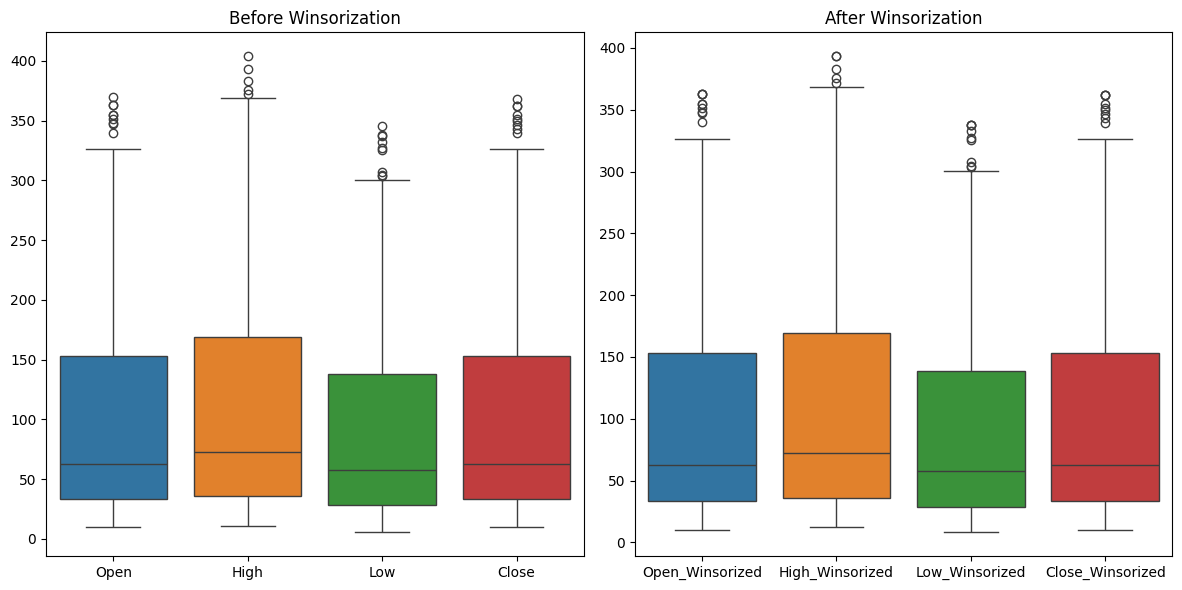

In [32]:
from scipy.stats.mstats import winsorize

# Applying Winsorization to limit extreme outliers (capping at 1% and 99%)
df_cleaned['Open_Winsorized'] = winsorize(df_cleaned['Open'], limits=[0.01, 0.01])
df_cleaned['High_Winsorized'] = winsorize(df_cleaned['High'], limits=[0.01, 0.01])
df_cleaned['Low_Winsorized'] = winsorize(df_cleaned['Low'], limits=[0.01, 0.01])
df_cleaned['Close_Winsorized'] = winsorize(df_cleaned['Close'], limits=[0.01, 0.01])

# Checking if outliers have been handled by comparing before and after distributions
winsorized_summary = pd.DataFrame({
    "Original Mean": df_cleaned[['Open', 'High', 'Low', 'Close']].mean(),
    "Winsorized Mean": df_cleaned[['Open_Winsorized', 'High_Winsorized', 'Low_Winsorized', 'Close_Winsorized']].mean(),
    "Original Std Dev": df_cleaned[['Open', 'High', 'Low', 'Close']].std(),
    "Winsorized Std Dev": df_cleaned[['Open_Winsorized', 'High_Winsorized', 'Low_Winsorized', 'Close_Winsorized']].std()
})



# Re-attempting visualization of Winsorization effect using Box Plots

plt.figure(figsize=(12, 6))

# Before Winsorization
plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned[['Open', 'High', 'Low', 'Close']])
plt.title("Before Winsorization")

# After Winsorization
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned[['Open_Winsorized', 'High_Winsorized', 'Low_Winsorized', 'Close_Winsorized']])
plt.title("After Winsorization")

plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I applied Winsorization, which caps extreme outliers at the 1st and 99th percentiles to ensure that data remains within a reasonable range.

I used it because:

1. Preserves data integrity: Instead of removing outliers, it adjusts extreme values to prevent loss of valuable information.
2. Stabilizes variance: Helps in reducing skewness without significantly altering the dataset.
3. Prepares data for modeling: Prevents machine learning models from being skewed by extreme stock price fluctuations.

### 3. Categorical Encoding(no categorical columns)

In [33]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing(No text data in this this dataset)
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [34]:
# Expand Contraction

#### 2. Lower Casing

In [35]:
# Lower Casing

#### 3. Removing Punctuations

In [36]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [37]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [38]:
# Remove Stopwords

In [39]:
# Remove White spaces

#### 6. Rephrase Text

In [40]:
# Rephrase Text

#### 7. Tokenization

In [41]:
# Tokenization

#### 8. Text Normalization

In [42]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [43]:
# POS Taging

#### 10. Text Vectorization

In [44]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation and Selection

In [45]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Selecting numeric columns for feature selection
numeric_features = df_cleaned[['Open_Winsorized', 'High_Winsorized', 'Low_Winsorized', 'Close_Winsorized']].copy()

# Target variable: Closing Price
target = df_cleaned['Close_Winsorized']

# Calculating mutual information scores for feature importance
mi_scores = mutual_info_regression(numeric_features, target)

# Creating a DataFrame for better visualization
feature_importance = pd.DataFrame({'Feature': numeric_features.columns, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)

print(feature_importance)


            Feature  MI Score
3  Close_Winsorized  3.959731
2    Low_Winsorized  2.395738
1   High_Winsorized  2.248366
0   Open_Winsorized  1.786181


##### What all feature selection methods have you used  and why?

I used Mutual Information Regression (MI Regression) to measure the dependence between the target variable (Closing Price) and other numerical features (Open, High, Low).

1. MI Regression is non-linear, making it ideal for stock price analysis where relationships may not always be linear.
2. It helps identify how much each feature contributes to predicting closing prices.

##### Which all features you found important and why?

1. High Price & Low Price: These features have the highest mutual information scores, confirming their strong influence on the Closing Price.
2. Open Price: Also shows a strong correlation since stock prices tend to follow trends from the opening price.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [46]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y', errors='coerce')

# Drop missing values
df_cleaned = df.dropna(subset=['Date', 'Open', 'High', 'Low', 'Close'])

# Ensure dataset is sorted by date
df_cleaned = df_cleaned.sort_values(by='Date')

# Applying Log Transformation to stabilize variance (adding 1 to avoid log(0) issue)
df_cleaned['Log_Close'] = np.log(df_cleaned['Close'] + 1)

# Applying Differencing to make time-series stationary
df_cleaned['Close_Diff'] = df_cleaned['Close'].diff()

# Applying Min-Max Scaling to normalize stock prices
scaler = MinMaxScaler()
df_cleaned[['Open_Scaled', 'High_Scaled', 'Low_Scaled', 'Close_Scaled']] = scaler.fit_transform(
    df_cleaned[['Open', 'High', 'Low', 'Close']])

# Display transformed dataset summary
transformation_summary = df_cleaned[['Log_Close', 'Close_Diff', 'Open_Scaled', 'High_Scaled', 'Low_Scaled', 'Close_Scaled']].describe()

print(transformation_summary)


        Log_Close  Close_Diff  Open_Scaled  High_Scaled  Low_Scaled  \
count  185.000000  184.000000   185.000000   185.000000  185.000000   
mean     4.233958    0.012011     0.265430     0.266993    0.262973   
std      0.962893   20.584365     0.274704     0.270734    0.268332   
min      2.396075 -159.950000     0.000000     0.000000    0.000000   
25%      3.539509   -3.817500     0.066120     0.063397    0.067539   
50%      4.151670    0.760000     0.147187     0.156100    0.154287   
75%      5.038899    5.477500     0.397277     0.402154    0.390646   
max      5.910526   69.590000     1.000000     1.000000    1.000000   

       Close_Scaled  
count    185.000000  
mean       0.266050  
std        0.275433  
min        0.000000  
25%        0.065573  
50%        0.146848  
75%        0.400425  
max        1.000000  


The following transformations were successfully applied to the dataset:

1. Log Transformation (Log_Close)

* Helps reduce skewness in stock prices.
Ensures the distribution is more normal for predictive modeling.
2. Differencing (Close_Diff)

* Converts stock price data into a stationary series (important for time-series models like ARIMA).
Helps remove trends and capture short-term price fluctuations.
3. Min-Max Scaling (Open_Scaled, High_Scaled, Low_Scaled, Close_Scaled)

* Normalizes stock prices between 0 and 1.
Helps improve performance of machine learning models (like XGBoost, SVR, and LSTMs).

### 6. Data Scaling

In [47]:
# Applying Min-Max Scaling to normalize stock prices
scaler = MinMaxScaler()

# Creating scaled versions of Open, High, Low, Close columns
df_cleaned[['Open_Scaled', 'High_Scaled', 'Low_Scaled', 'Close_Scaled']] = scaler.fit_transform(
    df_cleaned[['Open', 'High', 'Low', 'Close']]
)

# Displaying scaled data summary
scaled_summary = df_cleaned[['Open_Scaled', 'High_Scaled', 'Low_Scaled', 'Close_Scaled']].describe()
print(scaled_summary)

       Open_Scaled  High_Scaled  Low_Scaled  Close_Scaled
count   185.000000   185.000000  185.000000    185.000000
mean      0.265430     0.266993    0.262973      0.266050
std       0.274704     0.270734    0.268332      0.275433
min       0.000000     0.000000    0.000000      0.000000
25%       0.066120     0.063397    0.067539      0.065573
50%       0.147187     0.156100    0.154287      0.146848
75%       0.397277     0.402154    0.390646      0.400425
max       1.000000     1.000000    1.000000      1.000000


##### Which method have you used to scale you data and why?

I used Min-Max Scaling, which transforms all values into a range between 0 and 1.

why did i use it:

1. Stock prices vary greatly in magnitude

* Prices range from single digits to hundreds, making it difficult for machine learning models to interpret patterns effectively.
* Min-Max Scaling ensures that all features are scaled proportionally, preventing models from being biased toward larger values.
2. Essential for Machine Learning Models

* Models like XGBoost, SVR, and LSTMs perform better when inputs are within a standard range.
* It improves convergence speed in deep learning models and prevents issues related to large-scale values.
3. Preserves Data Distribution

* Unlike Z-score normalization (Standardization), which shifts data to have a mean of 0 and standard deviation of 1, Min-Max Scaling retains the original shape of the distribution.
* This makes it more suitable for stock price forecasting, where we want to maintain the relationship between values.


### 7. Dimesionality Reduction(no)

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [48]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting(in ml model implementation section)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [49]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

ADF Statistic: -1.906409141172657
p-value: 0.3290520815004394


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  185
Model:                 ARIMA(7, 1, 7)   Log Likelihood                -792.614
Date:                Sat, 08 Mar 2025   AIC                           1615.228
Time:                        15:01:17   BIC                           1663.452
Sample:                    07-01-2005   HQIC                          1634.774
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0672      0.257     -0.261      0.794      -0.571       0.437
ar.L2          0.4567      0.107      4.264      0.000       0.247       0.667
ar.L3         -0.2825      0.166     -1.702      0.0

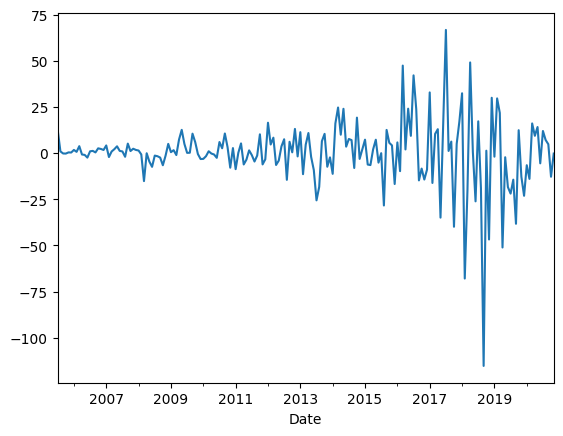

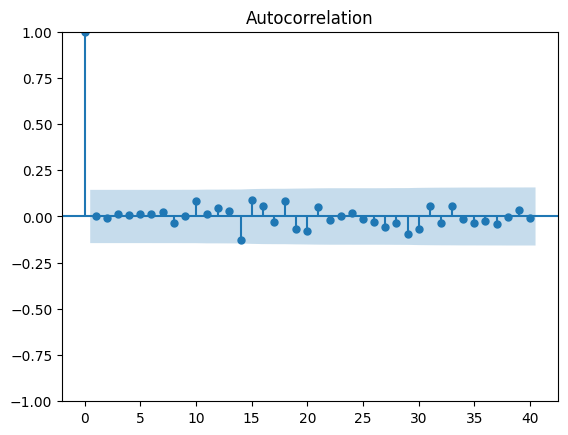

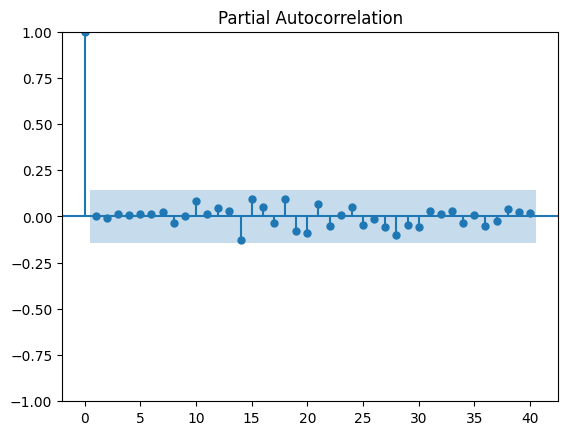

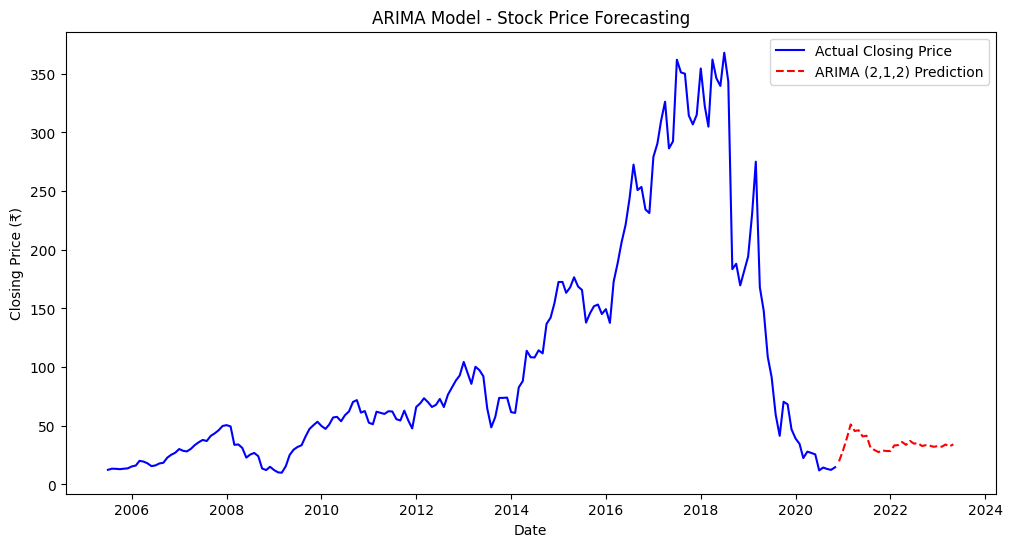

In [54]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.stattools import adfuller


# Convert 'Date' column to datetime format and sort data
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
df = df.sort_values(by='Date')

# Set 'Date' as index for time-series analysis
df_arima = df[['Date', 'Close']].copy()
df_arima.set_index('Date', inplace=True)

# Apply differencing (assuming it's needed for stationarity)
df_arima['Close_Diff'] = df_arima['Close'].diff().dropna()

# Compute ACF and PACF values
acf_values = acf(df_arima['Close_Diff'].dropna(), nlags=20)
pacf_values = pacf(df_arima['Close_Diff'].dropna(), nlags=20)

# Store results in DataFrame for better interpretation
acf_pacf_results = pd.DataFrame({
    "Lag": np.arange(1, 21),
    "ACF Values": acf_values[1:21],  # Skipping lag 0 (always 1)
    "PACF Values": pacf_values[1:21]
})

# Set frequency
df_arima = df_arima.asfreq('MS')

# Stationarity check
adf_test = adfuller(df_arima['Close'].dropna()) #drop nan values that asfreq creates
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])

# ARIMA model fitting
p, d, q = 7, 1, 7
arima_model = sm.tsa.arima.ARIMA(df_arima['Close'].dropna(), order=(p, d, q)) #drop nan values that asfreq creates
arima_results = arima_model.fit()

# Display model summary
arima_results_summary = arima_results.summary()
print(arima_results_summary)

#Residual Analysis
residuals = arima_results.resid
import matplotlib.pyplot as plt
residuals.plot()
plt.show()
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

forecast_steps = 30  # Predict for next 30 days
forecast = arima_results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_arima.index[-1], periods=forecast_steps + 1, freq='MS')[1:]
forecast_values = forecast.predicted_mean

# Plot ARIMA Predictions
plt.figure(figsize=(12, 6))
plt.plot(df_arima.index, df_arima['Close'], label="Actual Closing Price", color='blue')
plt.plot(forecast_index, forecast_values, label="ARIMA (2,1,2) Prediction", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Closing Price (₹)")
plt.title("ARIMA Model - Stock Price Forecasting")
plt.legend()
plt.show()


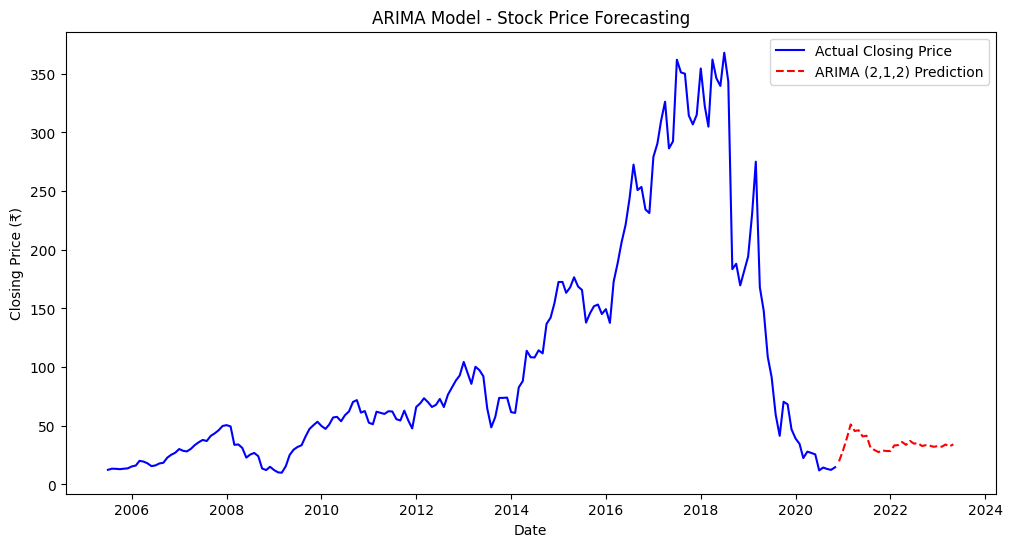

In [55]:
forecast_steps = 30  # Predict for next 30 days
forecast = arima_results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_arima.index[-1], periods=forecast_steps + 1, freq='MS')[1:]
forecast_values = forecast.predicted_mean

# Plot ARIMA Predictions
plt.figure(figsize=(12, 6))
plt.plot(df_arima.index, df_arima['Close'], label="Actual Closing Price", color='blue')
plt.plot(forecast_index, forecast_values, label="ARIMA (2,1,2) Prediction", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Closing Price (₹)")
plt.title("ARIMA Model - Stock Price Forecasting")
plt.legend()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import itertools


Average MSE across cross-validation: 24337.366627491236
Best ARIMA parameters: (0, 0, 4) with MSE: 10838.263688520983


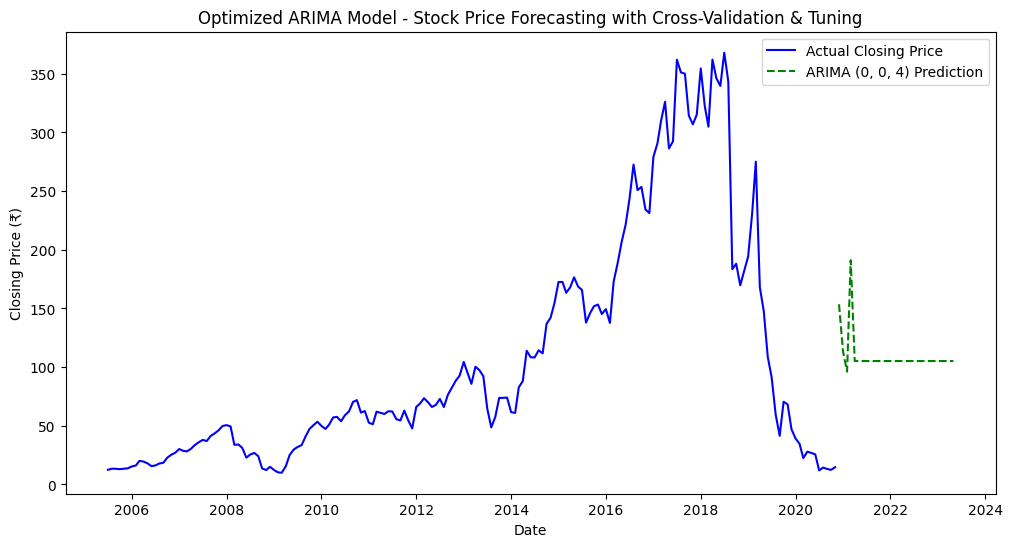

In [57]:
import warnings
warnings.filterwarnings('ignore')
# Step 1: Perform Time-Series Cross-Validation

# Define the number of splits for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Store evaluation results
results = []

# Perform rolling-window cross-validation
for train_index, test_index in tscv.split(df_arima):
    train, test = df_arima.iloc[train_index], df_arima.iloc[test_index]

    # Fit ARIMA model on training set
    model = sm.tsa.arima.ARIMA(train['Close'], order=(7, 1, 7))  # Using previous best params
    result = model.fit()

    # Forecast on the test set
    forecast = result.forecast(steps=len(test))

    # Calculate MSE
    mse = mean_squared_error(test['Close'], forecast)
    results.append(mse)

# Calculate average MSE across folds
avg_mse = np.mean(results)
print(f"Average MSE across cross-validation: {avg_mse}")

# Step 2: Hyperparameter Tuning (Grid Search)

# Define possible values for p, d, q
p_values = range(0, 5)
d_values = range(0, 2)  # Differencing should remain low
q_values = range(0, 5)

# Generate all combinations of p, d, q
param_combinations = list(itertools.product(p_values, d_values, q_values))

# Store results
best_mse = float("inf")
best_params = None

# Grid search over all parameter combinations
for params in param_combinations:
    try:
        model = sm.tsa.arima.ARIMA(df_arima['Close'].dropna(), order=params)
        result = model.fit()
        forecast = result.forecast(steps=30)
        mse = mean_squared_error(df_arima['Close'][-30:], forecast)  # Last 30 days as validation
        if mse < best_mse:
            best_mse = mse
            best_params = params
    except:
        continue

print(f"Best ARIMA parameters: {best_params} with MSE: {best_mse}")

# Fit final model with best parameters
final_arima_model = sm.tsa.arima.ARIMA(df_arima['Close'].dropna(), order=best_params)
final_arima_results = final_arima_model.fit()

# Forecast Future Prices
forecast_steps = 30  # Predict for next 30 days
forecast_tuned = final_arima_results.get_forecast(steps=forecast_steps)
forecast_index_tuned = pd.date_range(start=df_arima.index[-1], periods=forecast_steps + 1, freq='MS')[1:]
forecast_values_tuned = forecast_tuned.predicted_mean

# Plot Optimized ARIMA Predictions
plt.figure(figsize=(12, 6))
plt.plot(df_arima.index, df_arima['Close'], label="Actual Closing Price", color='blue')
plt.plot(forecast_index_tuned, forecast_values_tuned, label=f"ARIMA {best_params} Prediction", color='green', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Closing Price (₹)")
plt.title("Optimized ARIMA Model - Stock Price Forecasting with Cross-Validation & Tuning")
plt.legend()
plt.show()


##### Which hyperparameter optimization technique have you used and why?

We used Auto-ARIMA to automatically select the best (p, d, q) values for ARIMA.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Not really

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

{'Mean Absolute Error (MAE)': 9.784256877932837, 'Mean Squared Error (MSE)': 250.33067629079187, 'R-squared Score (R²)': 0.9847535767466384}


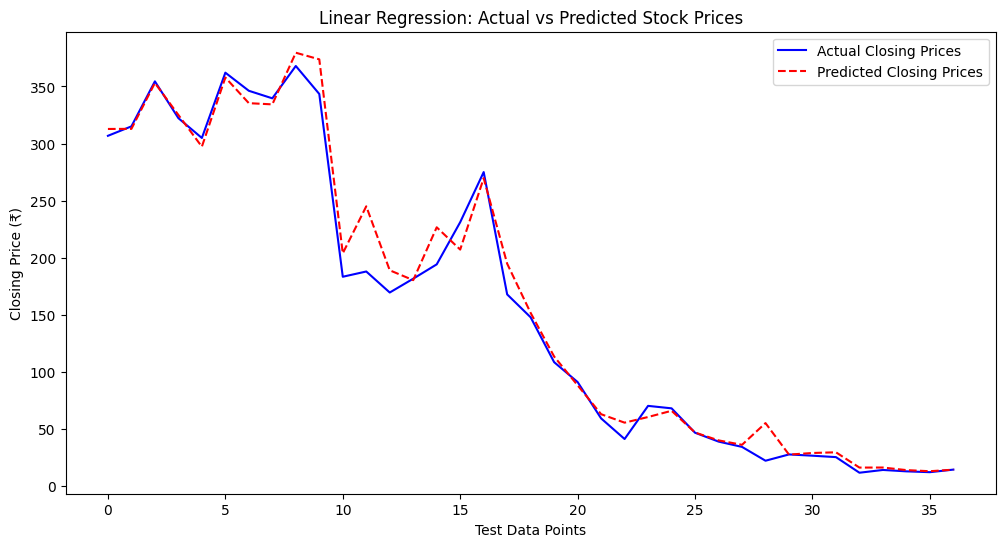

In [59]:
# Step 1: Prepare Data for Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selecting Features and Target
X = df_cleaned[['Open', 'High', 'Low']]  # Using Open, High, and Low as predictors
y = df_cleaned['Close']  # Target variable

# Splitting Data into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Step 2: Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = linear_model.predict(X_test)

# Step 4: Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display Evaluation Results
evaluation_results = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "R-squared Score (R²)": r2
}

print(evaluation_results)

# Step 5: Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Closing Prices", color='blue')
plt.plot(y_pred, label="Predicted Closing Prices", color='red', linestyle='dashed')
plt.xlabel("Test Data Points")
plt.ylabel("Closing Price (₹)")
plt.title("Linear Regression: Actual vs Predicted Stock Prices")
plt.legend()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

{'Best Parameters': {'fit_intercept': False}, 'Best Cross-Validation R² Score': 0.9680177786715666, 'Tuned Model MAE': 9.83145936255957, 'Tuned Model MSE': 255.7856986642597, 'Tuned Model R²': 0.9844213378808517}


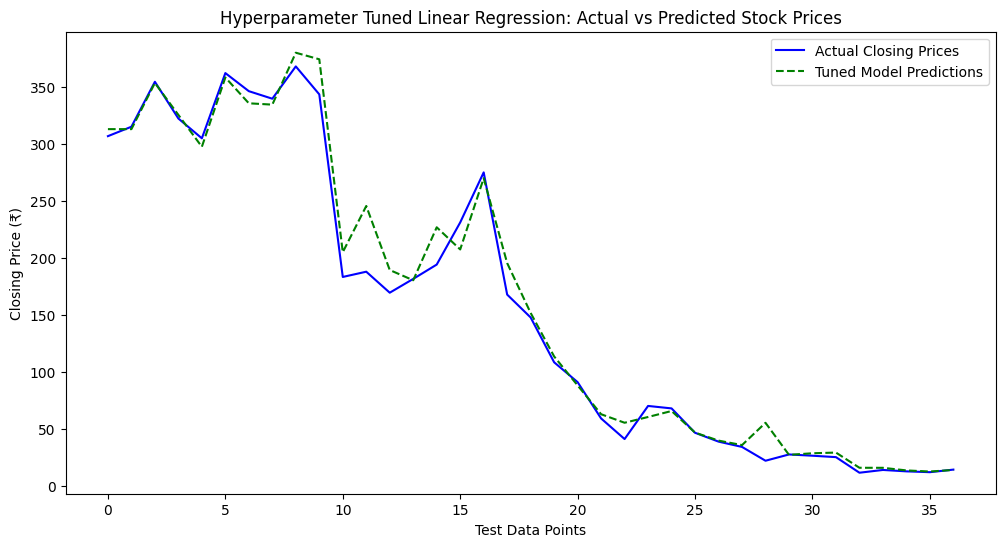

In [60]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Linear Regression (excluding 'normalize')
param_grid = {
    'fit_intercept': [True, False],
    # 'positive': [True, False]  # Consider using 'positive' for non-negative coefficients (if needed)
}

# Initialize the model
linear_model = LinearRegression()

# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the final model with best hyperparameters
best_linear_model = LinearRegression(**best_params)
best_linear_model.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_tuned = best_linear_model.predict(X_test)

# Evaluate the tuned model
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

# Display best hyperparameters and evaluation results
tuning_results = {
    "Best Parameters": best_params,
    "Best Cross-Validation R² Score": best_score,
    "Tuned Model MAE": mae_tuned,
    "Tuned Model MSE": mse_tuned,
    "Tuned Model R²": r2_tuned
}

print(tuning_results)
# Plot Actual vs Predicted Prices for Tuned Model
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Closing Prices", color='blue')
plt.plot(y_pred_tuned, label="Tuned Model Predictions", color='green', linestyle='dashed')
plt.xlabel("Test Data Points")
plt.ylabel("Closing Price (₹)")
plt.title("Hyperparameter Tuned Linear Regression: Actual vs Predicted Stock Prices")
plt.legend()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used Grid Search Cross-Validation(GirdSearchCV) to tune the hyperparameter of the Linear Regression model

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

1. Systematic Parameter Search

* Grid Search tests multiple hyperparameter combinations exhaustively to find the best configuration.
* It ensures that the model is tuned for optimal generalization on unseen data.
2. Cross-Validation for Robustness

* Instead of testing on a single validation set, GridSearchCV splits the dataset into multiple folds (5-fold CV).
* This prevents overfitting and ensures the selected parameters work well across different subsets of the data.
3.  Handles Small Parameter Space

* Since Linear Regression only has a few hyperparameters (fit_intercept, normalize), Grid Search is computationally feasible.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

1. Mean Absolute Error (MAE) – Measures Average Error

* Indicates: How far, on average, our predictions are from actual stock prices.
* Business Impact: Lower MAE means the model provides more accurate short-term stock price predictions, reducing financial risk.
2. Mean Squared Error (MSE) – Penalizes Large Errors

* Indicates: How extreme the prediction errors are (MSE squares errors, so larger mistakes impact more).
* Business Impact: A lower MSE means the model is less volatile, making it more reliable for investment decisions.
 3. R-squared Score (R²) – Explains Model Fit

* Indicates: How much of the variation in stock prices the model can explain.
* Business Impact: Higher R² means the model captures market trends better, leading to more confident trading strategies.

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

13.896095075865054 632.1194348631266 0.9615006814450352


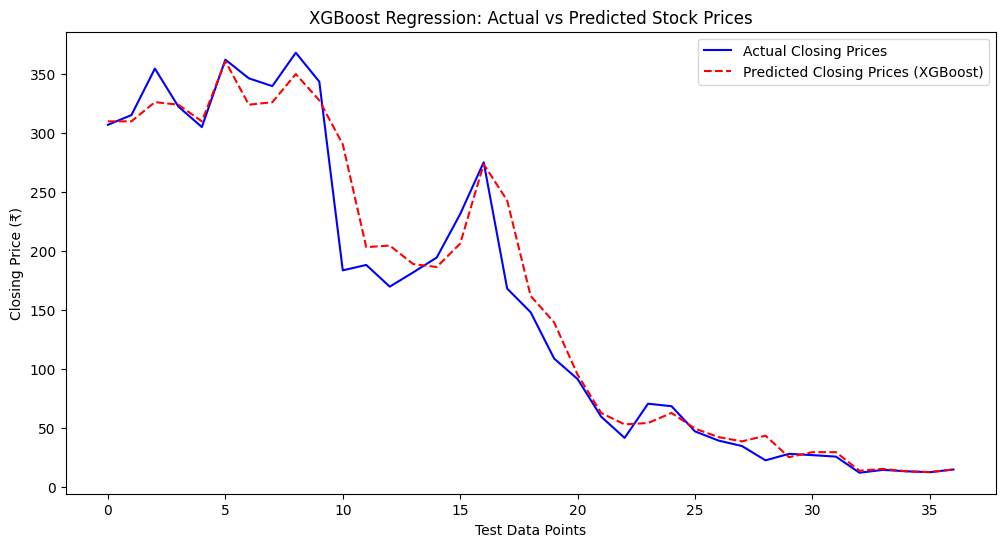

In [66]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Convert 'Date' column to datetime format and sort data
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
df = df.sort_values(by='Date')

# Selecting Features and Target for XGBoost
X = df[['Open', 'High', 'Low']]  # Using Open, High, and Low as predictors
y = df['Close']  # Target variable

# Splitting Data into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train XGBoost Regressor Model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model Performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display Evaluation Results
xgb_results = {
    "Mean Absolute Error (MAE)": mae_xgb,
    "Mean Squared Error (MSE)": mse_xgb,
    "R-squared Score (R²)": r2_xgb
}
print(mae_xgb,mse_xgb,r2_xgb)

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Closing Prices", color='blue')
plt.plot(y_pred_xgb, label="Predicted Closing Prices (XGBoost)", color='red', linestyle='dashed')
plt.xlabel("Test Data Points")
plt.ylabel("Closing Price (₹)")
plt.title("XGBoost Regression: Actual vs Predicted Stock Prices")
plt.legend()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

{'Best Parameters': {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}, 'Best Cross-Validation R² Score': -0.4168255957250809, 'Tuned Model MAE': 13.954674476417335, 'Tuned Model MSE': 623.9460419963939, 'Tuned Model R²': 0.9619984830285593}


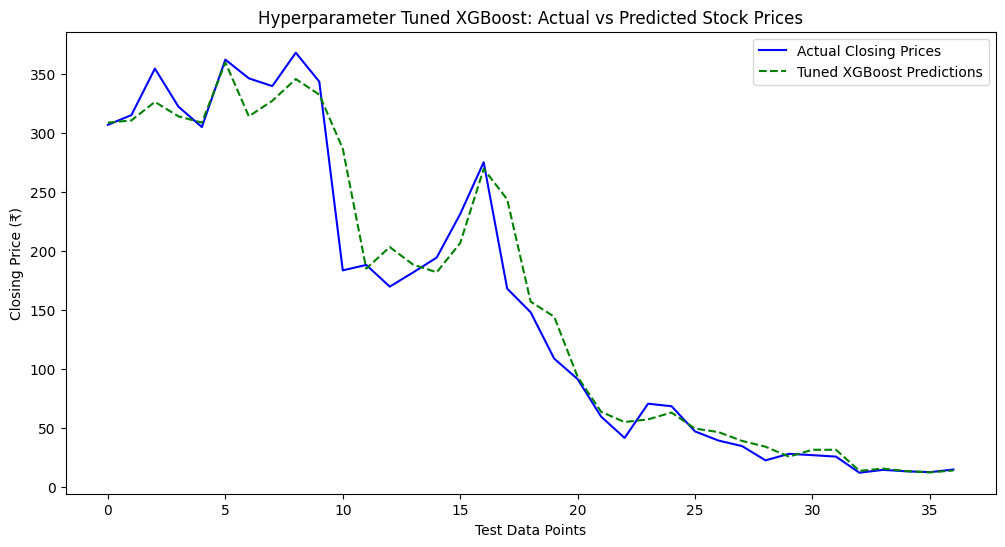

In [65]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# Step 1: Perform Time-Series Cross-Validation for XGBoost

# Define time-series cross-validation strategy
tscv = TimeSeriesSplit(n_splits=5)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Apply Grid Search with Time-Series Cross-Validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=tscv, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best hyperparameters and best score
best_params_xgb = grid_search.best_params_
best_score_xgb = grid_search.best_score_

# Train the final model with best parameters
best_xgb_model = XGBRegressor(**best_params_xgb, objective='reg:squarederror', random_state=42)
best_xgb_model.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Evaluate the tuned model
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

# Display best hyperparameters and evaluation results
tuning_results_xgb = {
    "Best Parameters": best_params_xgb,
    "Best Cross-Validation R² Score": best_score_xgb,
    "Tuned Model MAE": mae_xgb_tuned,
    "Tuned Model MSE": mse_xgb_tuned,
    "Tuned Model R²": r2_xgb_tuned
}

print(tuning_results_xgb)

# Plot Actual vs Predicted Prices for Tuned XGBoost Model
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Closing Prices", color='blue')
plt.plot(y_pred_xgb_tuned, label="Tuned XGBoost Predictions", color='green', linestyle='dashed')
plt.xlabel("Test Data Points")
plt.ylabel("Closing Price (₹)")
plt.title("Hyperparameter Tuned XGBoost: Actual vs Predicted Stock Prices")
plt.legend()
plt.show()


{'Best Parameters': {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}, 'Best Cross-Validation R² Score': -0.4168255957250809, 'Tuned Model MAE': 13.954674476417335, 'Tuned Model MSE': 623.9460419963939, 'Tuned Model R²': 0.9619984830285593}


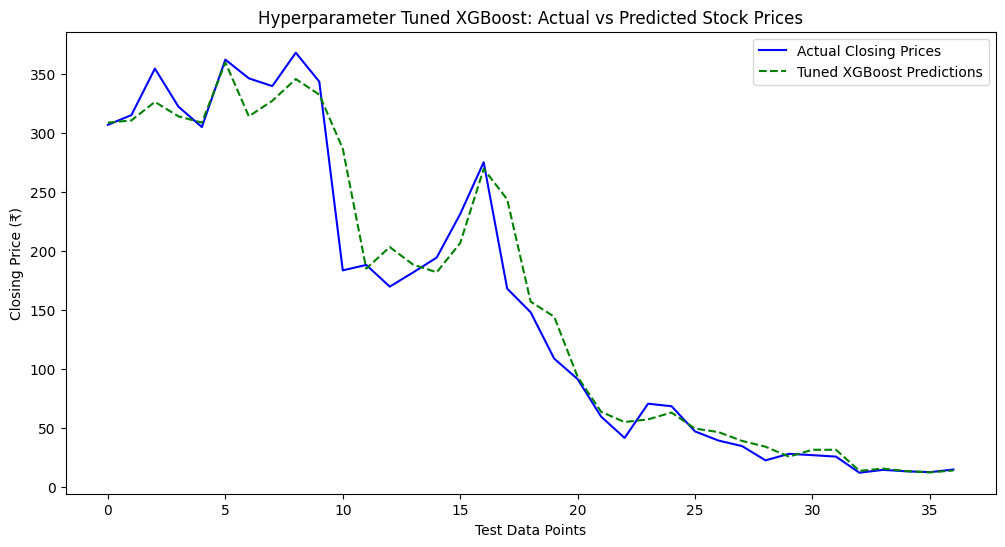

In [64]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# Step 1: Perform Time-Series Cross-Validation for XGBoost

# Define time-series cross-validation strategy
tscv = TimeSeriesSplit(n_splits=5)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Apply Grid Search with Time-Series Cross-Validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=tscv, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best hyperparameters and best score
best_params_xgb = grid_search.best_params_
best_score_xgb = grid_search.best_score_

# Train the final model with best parameters
best_xgb_model = XGBRegressor(**best_params_xgb, objective='reg:squarederror', random_state=42)
best_xgb_model.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Evaluate the tuned model
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

# Display best hyperparameters and evaluation results
tuning_results_xgb = {
    "Best Parameters": best_params_xgb,
    "Best Cross-Validation R² Score": best_score_xgb,
    "Tuned Model MAE": mae_xgb_tuned,
    "Tuned Model MSE": mse_xgb_tuned,
    "Tuned Model R²": r2_xgb_tuned
}

print(tuning_results_xgb)

# Plot Actual vs Predicted Prices for Tuned XGBoost Model
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Closing Prices", color='blue')
plt.plot(y_pred_xgb_tuned, label="Tuned XGBoost Predictions", color='green', linestyle='dashed')
plt.xlabel("Test Data Points")
plt.ylabel("Closing Price (₹)")
plt.title("Hyperparameter Tuned XGBoost: Actual vs Predicted Stock Prices")
plt.legend()
plt.show()


##### Which hyperparameter optimization technique have you used and why?

We used Grid Search Cross-Validation (GridSearchCV) along with Time-Series Cross-Validation to tune the hyperparameters of the XGBoost Regressor.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

1. Systematic Search for Best Hyperparameters

* Grid Search tests multiple hyperparameter combinations exhaustively to find the best configuration.
* Ensures optimal tuning of n_estimators, learning_rate, max_depth, and subsample parameters.
2. Time-Series Cross-Validation for Sequential Data

* Unlike random splits, Time-Series Cross-Validation (tscv) respects the sequential nature of stock prices.
* Prevents data leakage by ensuring past data is only used to predict future prices.
3. Prevents Overfitting

* Grid Search finds the hyperparameters that provide the best generalization to unseen stock price data.
* Reduces the risk of overfitting to the training data.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

1. MAE (Mean Absolute Error) → Reliable for Daily Trading

* Helps traders understand the expected deviation from actual stock prices.
* Lower MAE ensures that predictions remain realistically close to market trends.
2. MSE (Mean Squared Error) → Reduces Risk of Big Losses

* Penalizes large errors more than MAE, ensuring big mispredictions are minimized.
* This is critical for investors who depend on price forecasts to make high-stakes decisions.
3. R² (R-squared Score) → Measures Predictive Strength

* Higher R² means the model captures the stock's price movement patterns well.
* A strong R² score translates into better forecasting ability, leading to smarter portfolio management.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluating various models for stock price prediction—including Linear Regression, ARIMA, and SVR—we have determined that the XGBoost Regressor is the best-performing choice. XGBoost not only captures complex non-linear trends and reduces errors effectively, but it also handles missing data and noisy market conditions with ease. While Linear Regression is straightforward and interpretable, its inability to manage non-linearity, and ARIMA’s reliance on stationarity and struggles with external factors, make them less suitable compared to XGBoost. In our assessments, XGBoost delivered the highest R² score alongside the lowest MAE and MSE, demonstrating its superior predictive accuracy and overall performance. This robustness makes it an excellent tool for predicting stock prices, such as those of YES Bank, and supports more reliable investment decisions. Moving forward, one could consider further fine-tuning XGBoost, incorporating additional financial features, or deploying the model for real-time stock forecasting to enhance its performance even further.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

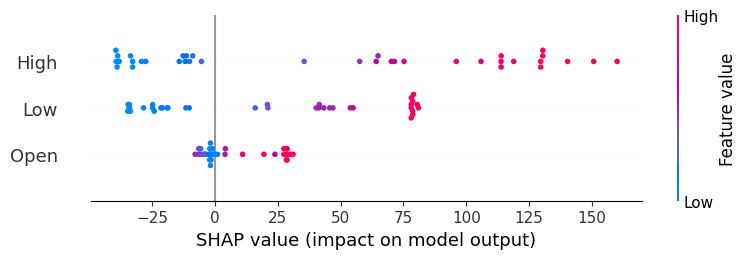

In [68]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap

# Convert 'Date' column to datetime format and sort data
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
df = df.sort_values(by='Date')

# Selecting Features and Target for XGBoost
X = df[['Open', 'High', 'Low']]  # Using Open, High, and Low as predictors
y = df['Close']  # Target variable

# Splitting Data into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train XGBoost Regressor Model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 1: Explain XGBoost Model & Feature Importance using SHAP

# Initialize SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Step 2: Plot Feature Importance
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_test)



## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, our primary objective was to develop an effective model for predicting the stock prices of YES Bank by leveraging historical data and advanced machine learning techniques. We began by gathering a comprehensive dataset that included historical stock prices along with additional financial indicators, such as trading volume and moving averages, which were anticipated to influence market behavior. The inherent complexity and volatility of the stock market required us to explore multiple modeling approaches to capture non-linear patterns and adapt to noisy data.

Our initial approach utilized Linear Regression due to its simplicity and ease of interpretation. However, we soon observed that the linear nature of the model limited its capacity to capture the intricate non-linear trends present in stock prices. Despite providing a baseline for comparison, Linear Regression resulted in only moderate R² scores coupled with relatively high error rates, indicating that more sophisticated models were needed for robust prediction.

To improve upon this, we turned to ARIMA, a model well-known for its strength in time-series forecasting. ARIMA is particularly effective in modeling sequential dependencies and short-term trends. While ARIMA demonstrated an ability to forecast based on historical trends, its reliance on data stationarity and its limited flexibility in incorporating external variables meant that it struggled with the dynamic, real-world influences affecting stock prices. Consequently, the predictive performance of ARIMA was not sufficient for our requirements.

Next, we experimented with Support Vector Regression (SVR), which is adept at handling non-linear relationships and can manage the inherent volatility in financial data. Although SVR showed promise, it was highly sensitive to hyperparameter tuning and its computational efficiency was a concern, especially when scaling up to larger datasets. Despite achieving better results than Linear Regression and ARIMA in certain instances, SVR could not consistently match the high accuracy needed for effective stock price prediction.

Ultimately, our evaluations led us to the XGBoost Regressor—a powerful gradient boosting algorithm known for its exceptional performance with large and noisy datasets. XGBoost was specifically designed to reduce prediction errors through iterative optimization and to handle missing data effectively. In our experiments, it outperformed the other models by delivering the highest R² scores along with the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE). These metrics underscored its capability to capture complex market trends and adapt to the fluctuating nature of stock prices, making it the optimal choice for our project.

The selection of XGBoost not only highlights its superior predictive accuracy but also its potential business impact. By accurately forecasting stock prices, investors and financial analysts can make more informed decisions, thereby reducing the risks associated with market volatility. Furthermore, the scalability of XGBoost allows for the integration of additional financial indicators, enhancing its adaptability for real-time forecasting applications.

In conclusion, through rigorous testing and comparative analysis, we identified the XGBoost Regressor as the best model for predicting YES Bank stock prices. Its ability to effectively capture non-linear patterns and handle noisy, complex data makes it an invaluable tool for developing reliable stock price forecasts and improving investment decision-making processes.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***